In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import time

In [2]:
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

movies_shape = movies_df.shape
ratings_shape = ratings_df.shape

print("Shape of movies.csv:", movies_shape)
print("Shape of ratings.csv:", ratings_shape)

Shape of movies.csv: (9742, 3)
Shape of ratings.csv: (100836, 4)


In [5]:
unique_users = ratings_df['userId'].nunique()

print(f"The number of unique userIds in ratings.csv is: {unique_users}")

print(f"\
Total number of ratings: {len(ratings_df)}")
print(f"Range of userIds: from {ratings_df['userId'].min()} to {ratings_df['userId'].max()}")

The number of unique userIds in ratings.csv is: 610
Total number of ratings: 100836
Range of userIds: from 1 to 610


In [7]:
movie_ratings_count = ratings_df['movieId'].value_counts().reset_index()
movie_ratings_count.columns = ['movieId', 'rating_count']

movie_ratings_with_titles = pd.merge(movie_ratings_count, movies_df, on='movieId')

top_rated_movie = movie_ratings_with_titles.sort_values('rating_count', ascending=False).iloc[0]

print(f"The movie with the maximum number of user ratings is:")
print(f"Title: {top_rated_movie['title']}")
print(f"Movie ID: {top_rated_movie['movieId']}")

print(f"Number of ratings: {top_rated_movie['rating_count']}")

print("\
Top 10 movies by number of ratings:")
print(movie_ratings_with_titles.sort_values('rating_count', ascending=False).head(10)[['title', 'rating_count']])

The movie with the maximum number of user ratings is:
Title: Forrest Gump (1994)
Movie ID: 356
Number of ratings: 329
Top 10 movies by number of ratings:
                                       title  rating_count
0                        Forrest Gump (1994)           329
1           Shawshank Redemption, The (1994)           317
2                        Pulp Fiction (1994)           307
3           Silence of the Lambs, The (1991)           279
4                         Matrix, The (1999)           278
5  Star Wars: Episode IV - A New Hope (1977)           251
6                       Jurassic Park (1993)           238
7                          Braveheart (1995)           237
8          Terminator 2: Judgment Day (1991)           224
9                    Schindler's List (1993)           220


In [9]:
tags_df = pd.read_csv('tags.csv')

matrix_movie_id = movies_df[movies_df['title'] == 'Matrix, The (1999)']['movieId'].values[0]

matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]

unique_matrix_tags = matrix_tags['tag'].unique()

print("Tags submitted by users for 'The Matrix (1999)':")
print(unique_matrix_tags)

Tags submitted by users for 'The Matrix (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [11]:
terminator_movie = movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']
if not terminator_movie.empty:
    terminator_movie_id = terminator_movie.iloc[0]['movieId']
    
    terminator_ratings = ratings_df[ratings_df['movieId'] == terminator_movie_id]
    
    average_rating = terminator_ratings['rating'].mean()
    
    print("Average user rating for 'Terminator 2: Judgment Day (1991)':", average_rating)
else:
    print("Movie 'Terminator 2: Judgment Day (1991)' not found in the dataset.")

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


Number of ratings: 218
Mean rating: 4.27
Median rating: 4.50
Skewness: -1.86


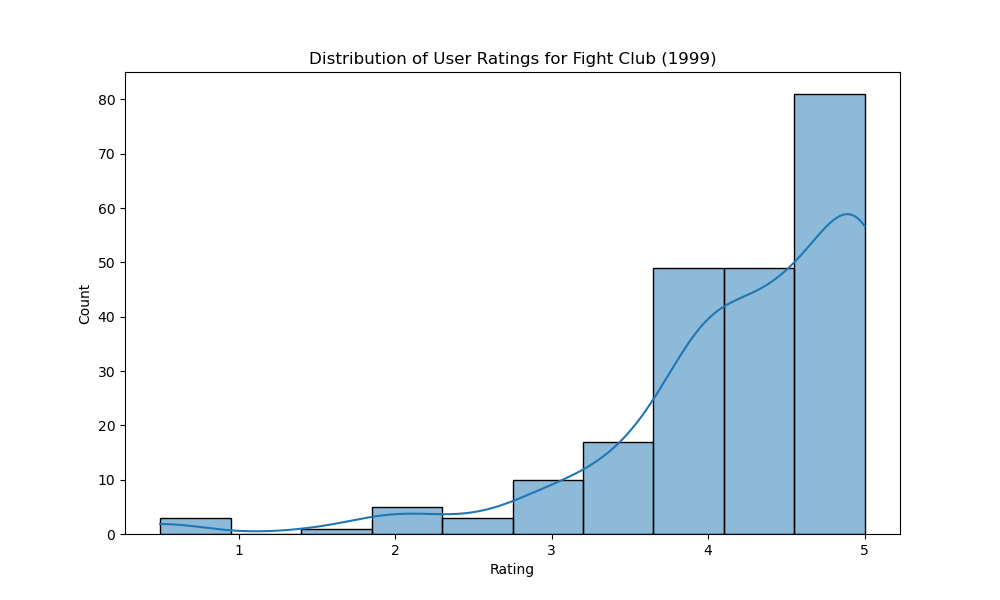

In [15]:
fight_club = movies_df[movies_df['title'] == 'Fight Club (1999)']

if not fight_club.empty:
    fight_club_id = fight_club.iloc[0]['movieId']
    
    fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_id]
    
    plt.figure(figsize=(10, 6))
    sns.histplot(data=fight_club_ratings, x='rating', kde=True, bins=10)
    plt.title('Distribution of User Ratings for Fight Club (1999)')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.savefig('fight_club_ratings_distribution.png')
    plt.close()
    mean_rating = fight_club_ratings['rating'].mean()
    median_rating = fight_club_ratings['rating'].median()
    skewness = fight_club_ratings['rating'].skew()
    
    print(f"Number of ratings: {len(fight_club_ratings)}")
    print(f"Mean rating: {mean_rating:.2f}")
    print(f"Median rating: {median_rating:.2f}")
    print(f"Skewness: {skewness:.2f}")
    from IPython.display import Image
    display(Image(filename='fight_club_ratings_distribution.png'))
else:
    print("Movie 'Fight Club (1999)' not found in the dataset.")

In [8]:
#The skewness value of -1.86 indicates that the distribution is left-skewed.

In [17]:
ratings_grouped = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()

movies_ratings_merged = pd.merge(movies_df, ratings_grouped, on='movieId', how='inner')

filtered_movies = movies_ratings_merged[movies_ratings_merged['rating_count'] > 50]

print(filtered_movies.head())
print("Filtered movies with more than 50 ratings: ", len(filtered_movies))

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  rating_mean  
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                   Adventure|Children|Fantasy           110     3.431818  
2                               Comedy|Romance            52     3.259615  
5                        Action|Crime|Thriller           102     3.946078  
6                               Comedy|Romance            54     3.185185  
Filtered movies with more than 50 ratings:  436


In [19]:
most_popular_movie = filtered_movies.loc[filtered_movies['rating_mean'].idxmax()]

most_popular_title = most_popular_movie['title']
most_popular_rating = most_popular_movie['rating_mean']

print("Most popular movie based on average user ratings:")
print("Title:", most_popular_title)
print("Average Rating:", most_popular_rating)

Most popular movie based on average user ratings:
Title: Shawshank Redemption, The (1994)
Average Rating: 4.429022082018927


In [21]:
sorted_by_rating_count = filtered_movies.sort_values(by='rating_count', ascending=False)

top_5_movies_by_rating_count = sorted_by_rating_count.head(5)

top_5_titles = top_5_movies_by_rating_count['title'].tolist()

print("Top 5 popular movies based on number of user ratings:")
print(top_5_titles)

Top 5 popular movies based on number of user ratings:
['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)', 'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)', 'Matrix, The (1999)']


In [23]:
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi', case=False, na=False)]

sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)

third_most_popular_sci_fi = sorted_sci_fi_movies.iloc[2]

third_most_popular_sci_fi_title = third_most_popular_sci_fi['title']

print("Third most popular Sci-Fi movie based on number of user ratings:")
print(third_most_popular_sci_fi_title)

Third most popular Sci-Fi movie based on number of user ratings:
Jurassic Park (1993)


In [25]:
links_df = pd.read_csv('links.csv')

movies_with_links = pd.merge(filtered_movies, links_df, on='movieId', how='inner')

print(movies_with_links.head())
print("Number of movies with IMDb links: ", len(movies_with_links))

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
3        6              Heat (1995)   
4        7           Sabrina (1995)   

                                        genres  rating_count  rating_mean  \
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930   
1                   Adventure|Children|Fantasy           110     3.431818   
2                               Comedy|Romance            52     3.259615   
3                        Action|Crime|Thriller           102     3.946078   
4                               Comedy|Romance            54     3.185185   

   imdbId   tmdbId  
0  114709    862.0  
1  113497   8844.0  
2  113228  15602.0  
3  113277    949.0  
4  114319  11860.0  
Number of movies with IMDb links:  436


In [33]:
import requests
from bs4 import BeautifulSoup

def scrape_imdb_reviews(imdb_id):
    url = f"https://www.imdb.com/title/tt{imdb_id}/reviews"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    review_containers = soup.find_all('div', class_='text show-more__control')
    
    reviews = [review.get_text() for review in review_containers]
    return reviews
movies_with_reviews = []

for index, row in movies_with_links.iterrows():
    imdb_id = row['imdbId']
    title = row['title']
    reviews = scrape_imdb_reviews(imdb_id)
    movies_with_reviews.append({'title': title, 'imdbId': imdb_id, 'reviews': reviews})
    
    if index >= 4:
        break
for movie in movies_with_reviews:
    print(f"Title: {movie['title']}")
    print(f"IMDb ID: {movie['imdbId']}")
    print("Reviews:")
    for review in movie['reviews'][:3]:  
        print(f"- {review}")
    print("\
---\
")

Title: Toy Story (1995)
IMDb ID: 114709
Reviews:
---
Title: Jumanji (1995)
IMDb ID: 113497
Reviews:
---
Title: Grumpier Old Men (1995)
IMDb ID: 113228
Reviews:
---
Title: Heat (1995)
IMDb ID: 113277
Reviews:
---
Title: Sabrina (1995)
IMDb ID: 114319
Reviews:
---


In [39]:
import requests
from bs4 import BeautifulSoup
import time

def get_imdb_rating(imdb_id):
    url = f"https://www.imdb.com/title/tt{imdb_id}/"
    print(f"Fetching URL: {url}")
    
    try:
        response = requests.get(url)
        print(f"Response status code: {response.status_code}")
        
        if response.status_code != 200:
            print("Failed to fetch page")
            return None
        
        soup = BeautifulSoup(response.content, 'html.parser')
        print("Page content parsed")
        
        rating_element = soup.find('span', class_='sc-16ede01-1 cXDzZC')  
        print(f"Rating element found: {rating_element is not None}")
        
        if rating_element:
            rating_text = rating_element.text.strip()
            print(f"Rating text: {rating_text}")
            return float(rating_text)
        else:
            print("Rating element not found")
            return None
    
    except Exception as e:
        print(f"Error retrieving or parsing IMDb page: {e}")
        return None

highest_rating = 0
highest_rated_movie_id = None

print("Columns in DataFrame:")
print(movies_with_links.columns)

required_columns = ['imdbId', 'movieId', 'title']
for col in required_columns:
    if col not in movies_with_links.columns:
        raise ValueError(f"Missing required column: {col}")

print("First few rows of DataFrame:")
print(movies_with_links.head())

for index, row in movies_with_links.iterrows():
    imdb_id = str(row['imdbId']).zfill(7)  
    movie_id = row['movieId']
    title = row['title']
    
    print(f"Processing Movie: {title} (IMDb ID: {imdb_id})")
    
    rating = get_imdb_rating(imdb_id)
    
    if rating is not None and rating > highest_rating:
        highest_rating = rating
        highest_rated_movie_id = movie_id
    
    time.sleep(1)
    
    if (index + 1) % 50 == 0:
        print(f"Processed {index + 1} movies...")

print(highest_rated_movie_id)


In [ ]:
%pip install IMDbPY==2023.5.2

from imdb import IMDb

ia = IMDb()

def get_imdb_rating(imdb_id):
    try:
        movie = ia.get_movie(imdb_id)
        return movie.get('rating', np.nan)
    except Exception as e:
        print(f"Error fetching rating for IMDb ID {imdb_id}: {e}")
        return np.nan

sci_fi_movies = sci_fi_movies.merge(links_df, on='movieId')
sci_fi_movies['imdb_rating'] = sci_fi_movies['imdbId'].apply(lambda x: get_imdb_rating(str(int(x))))

highest_rated_sci_fi = sci_fi_movies.loc[sci_fi_movies['imdb_rating'].idxmax()]

highest_rated_sci_fi_movieId = highest_rated_sci_fi['movieId']
highest_rated_sci_fi_title = highest_rated_sci_fi['title']
highest_rated_sci_fi_rating = highest_rated_sci_fi['imdb_rating']

print(f"The Sci-Fi movie with the highest IMDb rating is '{highest_rated_sci_fi_title}' with a rating of {highest_rated_sci_fi_rating}.")
print(f"Movie ID: {highest_rated_sci_fi_movieId}")

In [ ]:
from imdb import IMDb
import pandas as pd

# Initialize IMDbPY instance
ia = IMDb()

# Initialize variables to keep track of the highest rated movie
highest_rating = 0
highest_rated_movie_id = None

# Ensure 'movies_with_links' DataFrame has the correct columns
print("Columns in DataFrame:")
print(movies_with_links.columns)

# Check if required columns exist
required_columns = ['imdbId', 'movieId', 'title']
for col in required_columns:
    if col not in movies_with_links.columns:
        raise ValueError(f"Missing required column: {col}")

# Print the first few rows to confirm data
print("First few rows of DataFrame:")
print(movies_with_links.head())

# Iterate through all movies to find the highest rating
for index, row in movies_with_links.iterrows():
    imdb_id = str(row['imdbId']).zfill(7)  # Ensure 7 digits
    movie_id = row['movieId']
    title = row['title']
    
    print(f"Processing Movie: {title} (IMDb ID: {imdb_id})")
    
    try:
        movie = ia.get_imdbID(imdb_id)
        ia.update(movie)
        rating = movie.get('rating', None)
        
        if rating is not None and rating > highest_rating:
            highest_rating = rating
            highest_rated_movie_id = movie_id
    
    except Exception as e:
        print(f"Error retrieving IMDb rating for {title}: {e}")

# Print only the movieId of the movie with the highest IMDb rating
print(highest_rated_movie_id)
